IMPORTAMOS LIBRERÍAS

In [40]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [54]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

IMPORTAMOS EL CSV DE UBEREATS QUE LIMPIAREMOS

In [36]:
ue = pd.read_csv("../Data/UberEats.csv", index_col = 0)
ue.sample(3)

,Restaurante,Valoración,Nota,Delivery_Fee,ETA,Tag,Precio,Dirección,Barrio
68,TAMCOC,28,3.1,1.4,45–55,Italiana,€€€,"Calle De La Alianza 33, 28041",Arganzuela
46,Chocolateria Tacita de Plata,13,4.1,0.4,35–45,Postres,€,"Calle Gran Vía, 22, 28004",Centro
265,Doner kebap efes,23,4.7,1.9,25–35,Kebab,€€€,"Calle De López De Hoyos 11, 28006",Chamartín


In [38]:
#for col in ue:
    #print(col)
    #print(" ")
    #print(ue[col].value_counts())
    #print("-" * 30)

In [39]:
barrio = pd.read_csv("../Data/Barrios_cifras.csv")
barrio.head(3)

,Superficie,Superficie.1,Densidad,Población,0 a 15,16 a 64,65 +,% 0 a 15,% 16 a 64,% 65 +,Esp,Extr,% Esp,% Extr,Nacim,Def,C Natural,€ m2
0,Centro,523,270,141236,10608,108667,21961,8%,77%,16%,104726,36509,74%,26%,863,1252,-389,4865
1,Arganzuela,646,239,154243,18571,105078,30594,12%,68%,20%,137604,16637,89%,11%,1142,1764,-622,3888
2,Retiro,546,217,118557,14443,73037,31077,12%,62%,26%,108277,10279,91%,9%,801,1627,-826,4502


VAMOS CON VISUALIZACIONES QUE NOS LLEVEN A TOMAR DECISIONES

In [98]:
top10 = list(dict(ue["Tag"].value_counts()[0:10]).keys())
toptags = ue[ue["Tag"].isin(top10)]
tagss = px.histogram(toptags, x="Barrio",color="Tag")
tagss.show()


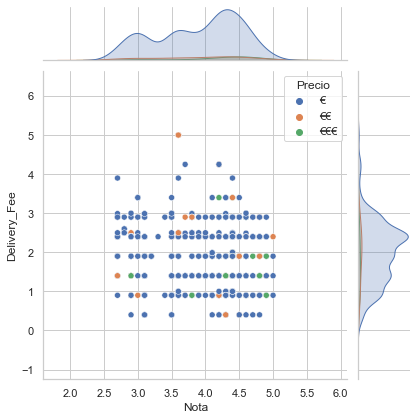

In [95]:
sns.jointplot(data=ue, x= "Nota", y= "Delivery_Fee", hue="Precio")

<AxesSubplot:xlabel='count', ylabel='Barrio'>

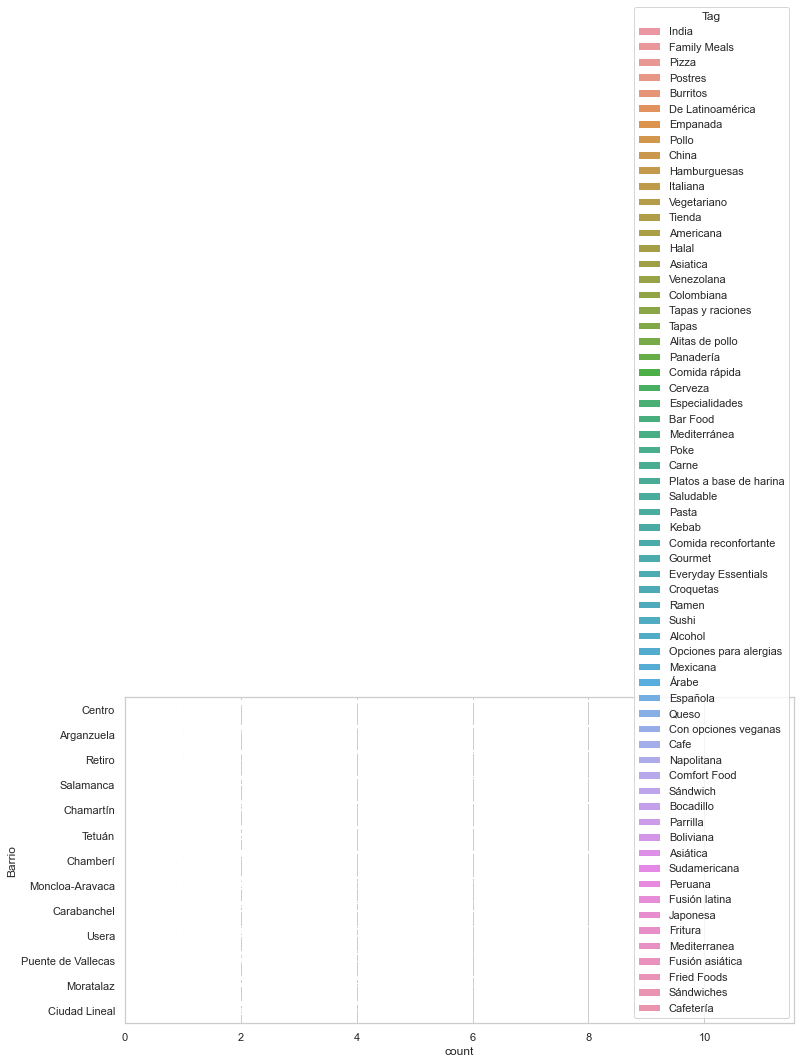

In [58]:
sns.countplot(y=ue.Barrio, hue=ue.Tag)

In [51]:
tagnota = ue.groupby(["Tag"])["Nota"].mean()
tagnota

Tag
Alcohol             3.920000
Alitas de pollo     4.300000
Americana           3.790476
Asiatica            4.114286
Asiática            3.600000
                      ...   
Tapas y raciones    3.428571
Tienda              4.600000
Vegetariano         3.100000
Venezolana          4.364706
Árabe               3.125000
Name: Nota, Length: 64, dtype: float64

In [48]:
fig = px.bar(ue, x="Tag", y="Nota")
fig.show()
